In [ ]:
import pandas as pd
pd.set_option("max_colwidth", 400)
pd.set_option("display.max.columns", None)

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")


In [ ]:
def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,
  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True
  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)

  return data

#ITC corpus retrieve data

In [ ]:

maps = glob.glob("/content/drive/MyDrive/Colab Notebooks/debates/us2016itc/*.json")


def conclusionPremiseDict(premises, conclusions):
    pairs = {}
    for i, x in enumerate(conclusions):
        pairs[i] = {'conclusion':x, 'premises':[]}
        id_to = x['fromID']
        for p in premises:
            if p['toID'] == id_to:
                pairs[i]['premises'].append(p)                
    return pairs


def aduPairs(edgePairs, nodesById):
    nodeid_list = []
    conc_id = []
    for pair in edgePairs.values():        
        conc_id.append(str(nodesById[pair['conclusion']['toID']]['text']))
    conc_id = set(conc_id)
    for cid in conc_id:
      premises_all = []
      for pair in edgePairs.values():
        if cid == str(nodesById[pair['conclusion']['toID']]['text']):
          for p in pair['premises']:
            premises_all.append(str(nodesById[p['fromID']]['text']))
      if len(premises_all) != 0:
        nodeid_list.append([cid, premises_all])
    return nodeid_list


def pairs(map):
    with open(map) as f:
        data = json.loads(f.read())
    nodesById = {}
    for _, node in enumerate(data['nodes']):
        nodesById[node['nodeID']] = node
        
    premises = [x for x in data['edges'] if nodesById[x['fromID']]['type'] == 'I' and (nodesById[x['toID']]['type'] == 'RA' or nodesById[x['toID']]['type'] == 'CA' or nodesById[x['toID']]['type'] == 'MA')]

    conclusions = [x for x in data['edges'] if (nodesById[x['fromID']]['type'] == 'RA' or nodesById[x['fromID']]['type'] == 'CA' or nodesById[x['fromID']]['type'] == 'MA') and nodesById[x['toID']]['type'] == 'I']
    edgePairs = conclusionPremiseDict(premises, conclusions)
    adus = aduPairs(edgePairs, nodesById)
    return adus, conclusions, premises, nodesById 

truePairs = []
conclusions = []
premises = []
nodesById = {}

map_number = []

for i, m in enumerate(maps):
    adus, c, p, n = pairs(m)
    truePairs.extend(adus)
    conclusions.extend(c)
    premises.extend(p)
    nodesById = {**nodesById, **n}
    for num in range(len(adus)):
      map_number.append(maps[i][-10:-5])          ########   check if only number stays in json path !!!!!

In [ ]:
data = pd.DataFrame(truePairs)
data.columns = ["conclusion", "premises"]
data['premises'] = data['premises'].apply(lambda x: " --- ".join(x))
data["map_ID"] = map_number
print(data.shape)
data.tail()

(154, 3)


,conclusion,premises,map_ID
149,in July of 2004 TRUMP came out strongly against the war with Iraq,TRUMP opposed the war --- I did a brief google and found a forum post quoting TRUMP from 2004 that seemed that he opposed the war,11310
150,"we need, BUSH, to build a wall",TRUMP will build a wall based on the statement of some guy,11312
151,"Senator Paul , you know , the hugs that CHRISTIE remembers are the hugs that CHRISTIE gave to the families who lost their people on September 11th",CHRISTIE hugged victims,11308
152,who has prosecuted and investigated and jailed terrorists in this country after September 11th,usin the deaths of people in 9/11 to help your campaign is not classy,11308
153,many of the people on this stage TRUMP has given a lot of money,TRUMP is blatantly admitting to buying politicians --- buying politicians is illegal --- buying politicians is not illegal,11311


In [ ]:
data['type_match'] = ""
data['c_match'] = ""
data['p_match'] = ""


for t in cid:
    for i in data.index:
      if data.loc[i, 'conclusion'].lower() == t:
        data.loc[i]['type_match'] = 'conclusion reddit'
        data.loc[i]['c_match'] = t

for t in pid:
  for i in data.index:
    if t in data.loc[i, 'premises'].lower():
      data.loc[i]['type_match'] = 'premise reddit'
      data.loc[i]['p_match'] = t


In [ ]:
data.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/us2016itc/file_itc.xlsx")

#Add debate - full politicians arguments text

In [ ]:
import json
import glob

d = glob.glob("/content/drive/MyDrive/Colab Notebooks/debates/US2016D1/*.json")
r = glob.glob("/content/drive/MyDrive/Colab Notebooks/debates/US2016R1/*.json")
g = glob.glob("/content/drive/MyDrive/Colab Notebooks/debates/US2016G1/*.json")

maps = d + r + g


def conclusionPremiseDict(premises, conclusions):
    pairs = {}
    for i, x in enumerate(conclusions):
        pairs[i] = {'conclusion':x, 'premises':[]}
        id_to = x['fromID']
        for p in premises:
            if p['toID'] == id_to:
                pairs[i]['premises'].append(p)                
    return pairs


def aduPairs(edgePairs, nodesById):
    nodeid_list = []
    conc_id = []
    for pair in edgePairs.values():        
        conc_id.append(str(nodesById[pair['conclusion']['toID']]['text']))

    conc_id = set(conc_id)
    for cid in conc_id:
      premises_all = []
      for pair in edgePairs.values():
        if cid == str(nodesById[pair['conclusion']['toID']]['text']):
          for p in pair['premises']:
            premises_all.append(str(nodesById[p['fromID']]['text']))
      if len(premises_all) != 0:
        nodeid_list.append([cid, premises_all])
    return nodeid_list



def pairs(map):
    with open(map) as f:
        data = json.loads(f.read())
    nodesById = {}
    for _, node in enumerate(data['nodes']):
        nodesById[node['nodeID']] = node
        
    premises = [x for x in data['edges'] if nodesById[x['fromID']]['type'] == 'I' and nodesById[x['toID']]['type'] == 'RA']

    conclusions = [x for x in data['edges'] if nodesById[x['fromID']]['type'] == 'RA' and nodesById[x['toID']]['type'] == 'I']
    edgePairs = conclusionPremiseDict(premises, conclusions)
    adus = aduPairs(edgePairs, nodesById)
    return adus, conclusions, premises, nodesById 



truePairs = []
conclusions = []
premises = []
nodesById = {}

map_number = []

for i, m in enumerate(maps):
    adus, c, p, n = pairs(m)
    truePairs.extend(adus)
    conclusions.extend(c)
    premises.extend(p)
    nodesById = {**nodesById, **n}
    for num in range(len(adus)):
      map_number.append(maps[i][-10:-5])    



# premises are returned in list, but they can easily be joined (here they are joined by " --- ", for example)
# conclusions are in a standard text format

df_text = pd.DataFrame(truePairs)
df_text.columns = ["conclusion", "premises"]
df_text['premises'] = df_text['premises'].apply(lambda x: " --- ".join(x))
df_text["map_ID"] = map_number
print(df_text.shape)
df_text.tail()

(1107, 3)


,conclusion,premises,map_ID
1102,CLINTON sure hopes people will get out and vote as though their future depended on it,people's future does depend on the election,11321
1103,perhaps it was worse than pressing the wrong button,perhaps it was corruption,11321
1104,perhaps it was corruption,these people that we were going to deport for good reason ended up becoming citizens,11321
1105,people are pouring into the USA,the other day USA were deporting 800 people,11321
1106,CLINTON certainly will support the outcome of this election,CLINTON supports USA's democracy,11321


In [ ]:
ids_match_itc = []
ids_match_corp_deb = []
str_match = []

for i1 in data.index:
  for i2 in df_text.index:
    if data.loc[i1, 'debate_claim'] in df_text.loc[i2, 'conclusion']:
      ids_match_itc.append(i1)
      ids_match_corp_deb.append(i2)
      str_match.append('conclusion')
    elif data.loc[i1, 'debate_claim'] in df_text.loc[i2, 'premises']:
      ids_match_itc.append(i1)
      ids_match_corp_deb.append(i2)
      str_match.append('premises')


In [ ]:
deb = np.concatenate([df_text.loc[ids_match_corp_deb], data.loc[ids_match_itc], pd.DataFrame(str_match, columns=['match_on'])], axis = 1)
deb = pd.DataFrame(deb, columns = list(df_text.columns)+list(data.columns)+['match_on'])

deb.drop_duplicates(['debate_claim','text_reddit'], inplace=True)

In [ ]:
deb.debate_claim.nunique()

68

In [ ]:
deb.reset_index(inplace=True, drop=True)

In [ ]:
deb['debate_match'] = ''
deb['debate_claim'] = ''


for i2 in deb.index:
    if deb.loc[i2, 'type_match'] == 'premise reddit':
      deb.loc[i2, 'debate_match'] = 'conclusion deb'
      deb.loc[i2, 'debate_claim'] = deb.loc[i2, 'conclusion']
    
    elif deb.loc[i2, 'type_match'] == 'conclusion reddit':
      deb.loc[i2, 'debate_match'] = 'premise deb'
      deb.loc[i2, 'debate_claim'] = deb.loc[i2, 'all_premises']



##Add multi-layers annotation

In [ ]:
df = load_data("/content/drive/MyDrive/Colab Notebooks/debates/us2016itc/file_itc.xlsx")

In [ ]:
df['conclusion'] = df['conclusion'].str.lower()
df['premises'] = df['premises'].str.lower()

In [ ]:
layers = load_data("/content/drive/MyDrive/Colab Notebooks/reddit_IAA/REDDIT_PATHOS_ETHOS_LOGOS_all.xlsx")

In [ ]:
df1 = pd.merge(df, layers, left_on = 'p_match', right_on='text_I', how = 'inner')
print(df1.shape)
df1.dropna(subset=['p_match', 'text_I'], axis=0, inplace=True)


df2 = pd.merge(df, layers, left_on = 'c_match', right_on='text_I', how = 'inner')
df2.dropna(subset=['c_match', 'text_I'], axis=0, inplace=True)
print(df2.shape)


df3 = pd.merge(df, layers, left_on = 'p_match', right_on='Text_pat', how = 'inner')
df3.dropna(subset=['p_match', 'Text_pat'], axis=0, inplace=True)
print(df3.shape)


df4 = pd.merge(df, layers, left_on = 'c_match', right_on='Text_pat', how = 'inner')
df4.dropna(subset=['c_match', 'Text_pat'], axis=0, inplace=True)


In [ ]:
df = pd.concat([df1, df2, df3, df4], axis = 0)

In [ ]:
df.drop_duplicates(['Text_pat', 'Num_pat', 'all_premises'], inplace=True)
df.sort_values(by = 'Num_pat', inplace=True)

#Add Reddit comments

In [ ]:
layers = load_data("/content/drive/MyDrive/Colab Notebooks/reddit_IAA/REDDIT_PATHOS_ETHOS_LOGOS_all.xlsx")
layers.drop_duplicates("Num_pat", inplace=True)
layers.shape

(4263, 51)

In [ ]:
df_num = df.Num_pat.tolist()
df_num = set(df_num)
len(df_num)

151

In [ ]:
et_num = layers.Num_pat.tolist()
et_num = set(et_num)
len(et_num)

4263

In [ ]:
add_redit = []

for n in df_num:
  new_up = [n + i for i in range(10)]
  add_redit.extend(new_up)

len(add_redit)

1510

In [ ]:
new_redit = set(add_redit).intersection(et_num)
len(new_redit)

1198

In [ ]:
new_redit = [i for i in new_redit if i not in df_num]
len(new_redit)

1047

In [ ]:
add_et = layers[layers.Num_pat.isin(new_redit)]
add_et.shape

(1047, 51)

In [ ]:
col_et = [c for c in layers.columns if c in df.columns]
len(col_et), len(layers.columns)

(46, 51)

In [ ]:
add_et = add_et[col_et]
add_et.shape

(1047, 46)

In [ ]:
col = [c for c in df.columns if c not in add_et.columns]

In [ ]:
for c in col:
  add_et[c] = np.nan

add_et.shape

(1047, 57)

In [ ]:
df.shape

(152, 57)

In [ ]:
add_et = add_et[df.columns]
add_et

In [ ]:
df_add = pd.concat([df, add_et], axis = 0)
df_add.sort_values(by = 'Num_pat', inplace=True)
df_add.reset_index(inplace=True, drop = True)
df_add.head()

In [ ]:
df_add.shape

(1199, 57)

In [ ]:
df_add[['debate_match', 'debate_claim']] = df_add[['debate_match', 'debate_claim']].fillna(method = 'ffill', limit = 10)

In [ ]:
df_add.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/us2016itc/file_itc_addinfo.xlsx")

#Results

##Preprocess

In [ ]:
merged = load_data('/content/drive/MyDrive/Colab Notebooks/debates/us2016itc/file_itc_addinfo.xlsx')
merged.shape

(707, 116)

In [ ]:
merged.tail(1)

,Num,debate,map_ID,debate_claim,conclusion,premises,text_reddit,timestamp,Node_id,nodeset_id,clean_text_reddit,recognized_emotion,recognised_sentiment,conclusion_lemmatized,conclusion_emotive_words,conclusion_joy,conclusion_anger,conclusion_sadness,conclusion_fear,conclusion_disgust,conclusion_surprise,conclusion_trust,conclusion_anticipation,conclusion_joy_individual,conclusion_anger_individual,conclusion_sadness_individual,conclusion_fear_individual,conclusion_disgust_individual,conclusion_surprise_individual,conclusion_trust_individual,conclusion_anticipation_individual,conclusion_emotion_categories_NRC,premises_lemmatized,premises_emotive_words,premises_joy,premises_anger,premises_sadness,premises_fear,premises_disgust,premises_surprise,premises_trust,premises_anticipation,premises_joy_individual,premises_anger_individual,premises_sadness_individual,premises_fear_individual,premises_disgust_individual,premises_surprise_individual,premises_trust_individual,premises_anticipation_individual,premises_emotion_categories_NRC,CATEGORY_premises_anger,CATEGORY_premises_disgust,CATEGORY_premises_fear,CATEGORY_premises_negative,CATEGORY_premises_sadness,CATEGORY_premises_trust,CATEGORY_premises_anticipation,CATEGORY_premises_surprise,CATEGORY_premises_joy,CATEGORY_premises_positive,premises_valence_words,premises_valence_negative,premises_valence_positive,premises_Negative_percentage,premises_Positive_percentage,full_argument,full_argument_lemmatized,full_argument_emotive_words,full_argument_joy,full_argument_anger,full_argument_sadness,full_argument_fear,full_argument_disgust,full_argument_surprise,full_argument_trust,full_argument_anticipation,full_argument_joy_individual,full_argument_anger_individual,full_argument_sadness_individual,full_argument_fear_individual,full_argument_disgust_individual,full_argument_surprise_individual,full_argument_trust_individual,full_argument_anticipation_individual,full_argument_emotion_categories_NRC,CATEGORY_full_argument_joy,CATEGORY_full_argument_positive,CATEGORY_full_argument_trust,CATEGORY_full_argument_anger,CATEGORY_full_argument_disgust,CATEGORY_full_argument_fear,CATEGORY_full_argument_negative,CATEGORY_full_argument_sadness,CATEGORY_full_argument_anticipation,CATEGORY_full_argument_surprise,full_argument_valence_words,full_argument_valence_negative,full_argument_valence_positive,full_argument_Negative_percentage,full_argument_Positive_percentage,CATEGORY_conclusion_trust,CATEGORY_conclusion_fear,CATEGORY_conclusion_negative,CATEGORY_conclusion_sadness,CATEGORY_conclusion_anger,CATEGORY_conclusion_surprise,CATEGORY_conclusion_positive,CATEGORY_conclusion_disgust,CATEGORY_conclusion_joy,CATEGORY_conclusion_anticipation,conclusion_valence_words,conclusion_valence_negative,conclusion_valence_positive,conclusion_Negative_percentage,conclusion_Positive_percentage
706.0,3861.0,G1,10675.0,b-52s are old enough that one's father or grandfather could be flying them,usa are not keeping up with other countries,b-52s are old enough that one's father or grandfather could be flying them,Thats insulting to a 15 year old,2016-11-08 18:16:00,231664.0,10592.0,thats insulting to a 15 year old,surprise,Negative,"['usa', 'be', 'not', 'keep', 'up', 'with', 'other', 'country']",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[],[],[],[],[],"['b-52s', 'be', 'old', 'enough', 'that', ""'s"", 'father', 'or', 'grandfather', 'could', 'be', 'fly', '-PRON-']","['father', 'grandfather']",0.0,0.0,0.0,0.0,0.0,0.0,0.633,0.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.586, 0.68]","[0.0, 0.0]","['trust', 'trust']",0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,"['old', 'father']",1.0,1.0,0.077,0.077,usa are not keeping up with other countries b-52s are old enough that one's father or grandfather could be flying them,"['usa', 'be', 'not', 'keep', 'up', 'with', 'other', 'country', 'b-52s', 'be', 'old', 'enough', 'that', ""'s"", 'father', 'or', 'grandfather', 'could', 'be', 'fly', '-PRON-']","['fath

In [ ]:
ddeb = merged[merged.debate == 'D1']
rdeb = merged[merged.debate == 'R1']
gdeb = merged[merged.debate == 'G1']

ddeb.shape, rdeb.shape, gdeb.shape

((225, 116), (314, 116), (168, 116))

In [ ]:
ddeb_grpd = pd.DataFrame(ddeb.groupby("debate_claim", as_index=True)['recognised_sentiment'].value_counts(normalize = True).round(2) * 100)
ddeb_grpd.columns = ['_'.join(col) for col in ddeb_grpd.columns]
ddeb_grpd = ddeb_grpd.reset_index()
ddeb_grpd.columns = ['debate_claim', 'pathotic_response', 'percentage']
ddeb_grpd.iloc[:5]

In [ ]:
ddeb_grpd.debate_claim.nunique(), ddeb.debate_claim.nunique(), 

(24, 24)

In [ ]:
rdeb_grpd = pd.DataFrame(rdeb.groupby("debate_claim", as_index=True)['recognised_sentiment'].value_counts(normalize = True).round(2) * 100)
rdeb_grpd.columns = ['_'.join(col) for col in rdeb_grpd.columns]
rdeb_grpd = rdeb_grpd.reset_index()
rdeb_grpd.columns = ['debate_claim', 'pathotic_response', 'percentage']
rdeb_grpd.iloc[:2]

,debate_claim,pathotic_response,percentage
0,"71 % of federal spending right now is on entitlements , and debt service , 71 %",Negative,50.0
1,"71 % of federal spending right now is on entitlements , and debt service , 71 %",Neutral,50.0


In [ ]:
gdeb_grpd = pd.DataFrame(gdeb.groupby("debate_claim", as_index=True)['recognised_sentiment'].value_counts(normalize = True).round(2) * 100)
gdeb_grpd.columns = ['_'.join(col) for col in gdeb_grpd.columns]
gdeb_grpd = gdeb_grpd.reset_index()
gdeb_grpd.columns = ['debate_claim', 'pathotic_response', 'percentage']
gdeb_grpd.iloc[:2]

,debate_claim,pathotic_response,percentage
0,b-52s are old enough that one's father or grandfather could be flying them,Negative,50.0
1,b-52s are old enough that one's father or grandfather could be flying them,Neutral,30.0


In [ ]:
ddeb_plot = ddeb.merge(ddeb_grpd, on = 'debate_claim', how = 'left')
print(ddeb_plot.shape)
ddeb_plot.drop_duplicates(['debate_claim','pathotic_response'], inplace=True)
print(ddeb_plot.shape)
ddeb_plot.tail(1)

In [ ]:
ddeb_plot.reset_index(inplace = True, drop = True)

In [ ]:
rdeb_plot = rdeb.merge(rdeb_grpd, on = 'debate_claim', how = 'left')
print(rdeb_plot.shape)
rdeb_plot.drop_duplicates(['debate_claim','pathotic_response'], inplace=True)
print(rdeb_plot.shape)

rdeb_plot.reset_index(inplace = True, drop = True)

(825, 118)
(72, 118)


In [ ]:
gdeb_plot = gdeb.merge(gdeb_grpd, on = 'debate_claim', how = 'left')
print(gdeb_plot.shape)
gdeb_plot.drop_duplicates(['debate_claim','pathotic_response'], inplace=True)
print(gdeb_plot.shape)

gdeb_plot.reset_index(inplace = True, drop = True)

(398, 118)
(38, 118)


##Correlation

In [ ]:
eliciting_emo = ['conclusion_joy',
 'conclusion_anger',
 'conclusion_sadness',
 'conclusion_fear',
 'conclusion_disgust',
 'conclusion_surprise',
 'conclusion_trust', 'conclusion_anticipation', 
 'premises_joy',
 'premises_anger',
 'premises_sadness',
 'premises_fear',
 'premises_disgust',
 'premises_surprise',
 'premises_trust',
 'premises_anticipation',
 'full_argument_joy',
 'full_argument_anger',
 'full_argument_sadness',
 'full_argument_fear',
 'full_argument_disgust',
 'full_argument_trust', 'full_argument_surprise', 'full_argument_anticipation']

In [ ]:
for c in eliciting_emo:
  rdeb_plot[c] = rdeb_plot[c].apply(lambda x: np.log(x+1))



In [ ]:
#rdeb_plot['percentage'] = rdeb_plot['percentage'].apply(lambda x: np.log(x+1))
gdeb_plot['percentage'] = gdeb_plot['percentage'].apply(lambda x: np.log(x+1))

In [ ]:
#  df_log = df[to_log].applymap(lambda x: np.log(x+1))

# log transform values

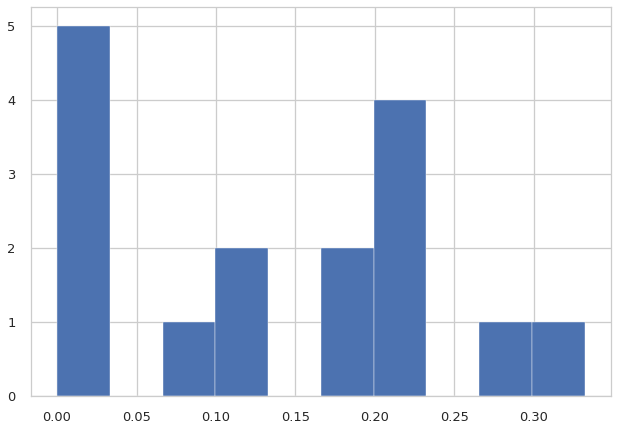

In [ ]:
gdeb_plot[gdeb_plot.pathotic_response == 'surprise']['full_argument_surprise'].hist()


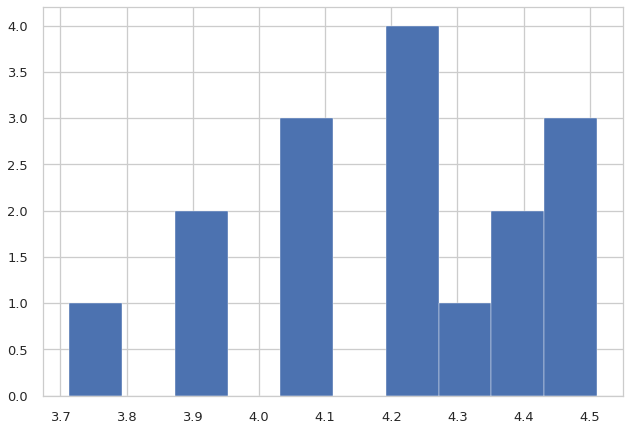

In [ ]:
gdeb_plot[gdeb_plot.pathotic_response == 'surprise']['percentage'].hist()
plt.show()

In [ ]:
emo = ['surprise', 'fear', 'joy', 'anger', 'sadness', 'disgust'] 
# ['surprise', 'fear', 'joy', 'anger', 'sadness', 'disgust']    ['Positive', "Negative"]

claims = gdeb_plot.debate_claim.unique() 
claims[:5]

array(["that starts with raising the national minimum wage and also guarantee , finally , equal pay for women 's work",
       'so ford is leaving',
       'clinton and others , politicians , should have been doing this for years , not right now',
       "the first thing you do is don't let the jobs leave",
       'the companies are leaving'], dtype=object)

In [ ]:
len(claims)

16

In [ ]:
from scipy.stats import pearsonr, pointbiserialr

In [ ]:
one = []
second = []
corcof = []
pvals = []

bi_one = []
bi_second = []
biser = []
pval_biser = []


df = gdeb_plot.copy() 
df = df.dropna(axis=0)


for ex in emo:  
  for el in eliciting_emo:    
    epx_val = []
    elic_val = []

    bi_epx_val = []
    bi_elic_val = []
    for c in claims:
      emotions = df[df.debate_claim == c]['pathotic_response'].unique()
      len_eliciting = len(df[(df.debate_claim == c) & (df.pathotic_response == ex) ])
      if len_eliciting > 0:
        eliciting = df[(df.debate_claim == c) & (df.pathotic_response == ex) ][el].iloc[0]
        elic_val.append(eliciting)
        bi_elic_val.append(eliciting)        
      else:
        eliciting = 0


      if ((ex in emotions) and (len_eliciting > 0)):
        bi_epx_val.append(1)
        express_val = df[ (df.debate_claim == c) & (df.pathotic_response == ex) ]['percentage'].iloc[0]
        epx_val.append(express_val)
      elif ((ex not in emotions) and (len_eliciting > 0)):
        bi_epx_val.append(0)
        epx_val.append(0)
      else:
        pass
    if len(elic_val) > 8 and len(epx_val):

      coef2, pval = pearsonr(elic_val, epx_val)
      coefbi, bi_p = pointbiserialr(bi_elic_val, bi_epx_val)
      print(ex,  ' -- ', el)
      if pval < 0.05:
        print(epx_val, elic_val)
      print(round(coef2, 2), round(pval, 3),'\t', round(coefbi, 2), round(bi_p, 3), "\n")
      if coef2 != np.nan:
        corcof.append(round(coef2, 2))
        pvals.append(round(pval, 3))
        one.append(ex)
        second.append(el)

      if (coefbi != np.nan) or (coefbi != np.NaN):
        biser.append(round(coefbi, 2))
        pval_biser.append(round(bi_p, 3))
        bi_one.append(ex)
        bi_second.append(el)
  
len(epx_val), len(elic_val)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


surprise  --  conclusion_joy
-0.1 0.803 	 nan nan 

surprise  --  conclusion_anger
-0.6 0.086 	 nan nan 

surprise  --  conclusion_sadness
0.38 0.309 	 nan nan 

surprise  --  conclusion_fear
[4.454347296253507, 4.51085950651685, 4.2626798770413155, 4.51085950651685, 4.394449154672439, 4.110873864173311, 3.9318256327243257, 3.9318256327243257, 4.2626798770413155] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21887043747560386, 0.3220834957137716, 0.0]
-0.8 0.009 	 nan nan 

surprise  --  conclusion_disgust
0.31 0.412 	 nan nan 

surprise  --  conclusion_surprise
[4.454347296253507, 4.51085950651685, 4.2626798770413155, 4.51085950651685, 4.394449154672439, 4.110873864173311, 3.9318256327243257, 3.9318256327243257, 4.2626798770413155] [0.14863549328271244, 0.21026092335790889, 0.21026092335790889, 0.21026092335790889, 0.21993842581865586, 0.21993842581865586, 0.0, 0.0, 0.15186235320095828]
0.77 0.016 	 nan nan 

surprise  --  conclusion_trust
-0.32 0.397 	 nan nan 

surprise  --  conclusion_anticipat

(0, 0)

In [ ]:
df_cor4_bi = pd.DataFrame({"first_emotion": bi_one, 
                       "second_emotion": bi_second, 
                       "cor": biser, 
                       "p_value":pval_biser})

df_cor4_bi.head(2)

,first_emotion,second_emotion,cor,p_value
0,surprise,conclusion_joy,NaN,NaN
1,surprise,conclusion_anger,NaN,NaN


In [ ]:
df_cor4_bi[df_cor4_bi.p_value < 0.05]

,first_emotion,second_emotion,cor,p_value


In [ ]:
# pearson r correlation - general df

df_cor4 = pd.DataFrame({"first_emotion": one, 
                       "second_emotion": second, 
                       "cor": corcof, 
                       "p_value":pvals})

df_cor4.head(2)

,first_emotion,second_emotion,cor,p_value
0,surprise,conclusion_joy,-0.1,0.803
1,surprise,conclusion_anger,-0.6,0.086


In [ ]:
df_cor4[df_cor4.p_value < 0.05] # R1 emotions after log transform

,first_emotion,second_emotion,cor,p_value
2,surprise,conclusion_sadness,-0.54,0.009
4,surprise,conclusion_disgust,-0.51,0.016
18,surprise,full_argument_sadness,-0.51,0.014
20,surprise,full_argument_disgust,-0.46,0.033
81,sadness,premises_anger,0.77,0.016


In [ ]:
df_cor4[df_cor4.p_value < 0.05].values

array([['surprise', 'conclusion_sadness', -0.54, 0.009],
       ['surprise', 'conclusion_disgust', -0.51, 0.016],
       ['surprise', 'full_argument_sadness', -0.51, 0.014],
       ['surprise', 'full_argument_disgust', -0.46, 0.033],
       ['sadness', 'premises_anger', 0.77, 0.016]], dtype=object)

In [ ]:
df_cor4[df_cor4.p_value < 0.05] # G1 emotions after log transform

,first_emotion,second_emotion,cor,p_value
3,surprise,conclusion_fear,-0.80,0.009
5,surprise,conclusion_surprise,0.77,0.016
17,surprise,full_argument_anger,-0.77,0.015
19,surprise,full_argument_fear,-0.92,0.000
22,surprise,full_argument_surprise,0.76,0.017


In [ ]:
df_cor4[df_cor4.p_value < 0.05].values

array([['surprise', 'conclusion_fear', -0.8, 0.009],
       ['surprise', 'conclusion_surprise', 0.77, 0.016],
       ['surprise', 'full_argument_anger', -0.77, 0.015],
       ['surprise', 'full_argument_fear', -0.92, 0.0],
       ['surprise', 'full_argument_surprise', 0.76, 0.017]], dtype=object)

In [ ]:
corr_eng = pd.DataFrame([['surprise', 'conclusion_sadness', -0.54, 0.009],
       ['surprise', 'conclusion_disgust', -0.51, 0.016],
       ['surprise', 'full_argument_sadness', -0.51, 0.014],
       ['surprise', 'full_argument_disgust', -0.46, 0.033],
       ['sadness', 'premises_anger', 0.77, 0.016], 

       ['surprise', 'conclusion_fear', -0.8, 0.009],
       ['surprise', 'conclusion_surprise', 0.77, 0.016],
       ['surprise', 'full_argument_anger', -0.77, 0.015],
       ['surprise', 'full_argument_fear', -0.92, 0.0],
       ['surprise', 'full_argument_surprise', 0.76, 0.017]])
corr_eng

,0,1,2,3
0,surprise,conclusion_sadness,-0.54,0.009
1,surprise,conclusion_disgust,-0.51,0.016
2,surprise,full_argument_sadness,-0.51,0.014
3,surprise,full_argument_disgust,-0.46,0.033
4,sadness,premises_anger,0.77,0.016
5,surprise,conclusion_fear,-0.80,0.009
6,surprise,conclusion_surprise,0.77,0.016
7,surprise,full_argument_anger,-0.77,0.015
8,surprise,full_argument_fear,-0.92,0.000
9,surprise,full_argument_surprise,0.76,0.017


In [ ]:
corr_eng.columns = ['expressed', 'eliciting', 'coeff', 'pvalue']
corr_eng['debate'] = ["D1-EN"]*5 + ["D2-EN"]*5
corr_eng.head()

,expressed,eliciting,coeff,pvalue,debate
0,surprise,conclusion_sadness,-0.54,0.009,D1-EN
1,surprise,conclusion_disgust,-0.51,0.016,D1-EN
2,surprise,full_argument_sadness,-0.51,0.014,D1-EN
3,surprise,full_argument_disgust,-0.46,0.033,D1-EN
4,sadness,premises_anger,0.77,0.016,D1-EN


##Correlation plots

In [ ]:
corr_all = pd.concat([corr_eng, corr_pl], axis = 0)
corr_all = corr_all.reset_index(drop = True)
corr_all

In [ ]:
corr_all.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/corrNewlog4debates.xlsx')

In [ ]:
corrs = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/correlations_4debates.xlsx')
corrs.head(3)

,first_emotion,second_emotion,correlation,p_value,debate
0.0,disgust,conclusion_Fear,0.42,0.016,PL-JUNE
1.0,disgust,premise_Fear,0.41,0.018,PL-JUNE
2.0,disgust,full_argument_Fear,0.48,0.005,PL-JUNE


In [ ]:
corrs['second_emotion'] = corrs['second_emotion'].apply(lambda x: str(x).lower())

In [ ]:
corrs.groupby(['first_emotion', 'second_emotion', 'debate']).mean()

correlation  p_value
first_emotion second_emotion         debate                       
anger         conclusion_anger       EN-R1           0.55    0.022
              conclusion_disgust     EN-R1           0.50    0.040
              conclusion_fear        EN-R1           0.53    0.029
              conclusion_happiness   PL-JUNE        -0.24    0.034
              conclusion_surprise    EN-G1          -0.82    0.023
disgust       conclusion_fear        PL-JUNE         0.42    0.016
              full_argument_fear     PL-JUNE         0.48    0.005
              premise_fear           PL-JUNE         0.41    0.018
fear          conclusion_disgust     PL-MAY          0.33    0.039
              conclusion_sadness     PL-JUNE         0.27    0.018
joy           conclusion_sadness     EN-G1          -0.97    0.001
              premise_anger          PL-MAY         -0.32    0.047
sadness       conclusion_sadness     PL-MAY          0.32    0.046
              full_argument_sadness  PL-MAY          0.36    0.023
              premises_anger         EN-R1           0.84    0.004
surprise      conclusion_disgust     EN-R1          -0.51    0.015
              conclusion_happiness   PL-JUNE         0.24    0.037
              conclusion_sadness     EN-R1          -0.54    0.009
              conclusion_surprise    EN-G1           0.72    0.028
              full_argument_anger    EN-G1          -0.73    0.026
              full_argument_disgust  EN-R1          -0.47    0.028
              full_argument_fear     EN-G1          -0.88    0.002
              full_argument_sadness  EN-R1          -0.53    0.011
              full_argument_surprise EN-G1           0.72    0.029
              premise_anger          PL-JUNE         0.28    0.013

In [ ]:
corrs.groupby(['second_emotion', 'first_emotion', 'debate']).mean()

correlation  p_value
second_emotion         first_emotion debate                       
conclusion_anger       anger         EN-R1           0.55    0.022
conclusion_disgust     anger         EN-R1           0.50    0.040
                       fear          PL-MAY          0.33    0.039
                       surprise      EN-R1          -0.51    0.015
conclusion_fear        anger         EN-R1           0.53    0.029
                       disgust       PL-JUNE         0.42    0.016
conclusion_happiness   anger         PL-JUNE        -0.24    0.034
                       surprise      PL-JUNE         0.24    0.037
conclusion_sadness     fear          PL-JUNE         0.27    0.018
                       joy           EN-G1          -0.97    0.001
                       sadness       PL-MAY          0.32    0.046
                       surprise      EN-R1          -0.54    0.009
conclusion_surprise    anger         EN-G1          -0.82    0.023
                       surprise      EN-G1           0.72    0.028
full_argument_anger    surprise      EN-G1          -0.73    0.026
full_argument_disgust  surprise      EN-R1          -0.47    0.028
full_argument_fear     disgust       PL-JUNE         0.48    0.005
                       surprise      EN-G1          -0.88    0.002
full_argument_sadness  sadness       PL-MAY          0.36    0.023
                       surprise      EN-R1          -0.53    0.011
full_argument_surprise surprise      EN-G1           0.72    0.029
premise_anger          joy           PL-MAY         -0.32    0.047
                       surprise      PL-JUNE         0.28    0.013
premise_fear           disgust       PL-JUNE         0.41    0.018
premises_anger         sadness       EN-R1           0.84    0.004

In [ ]:
corr_eng

,expressed,eliciting,coeff,pvalue,debate
0,surprise,conclusion_sadness,-0.54,0.009,D1-EN
1,surprise,conclusion_disgust,-0.51,0.016,D1-EN
2,surprise,full_argument_sadness,-0.51,0.014,D1-EN
3,surprise,full_argument_disgust,-0.46,0.033,D1-EN
4,sadness,premises_anger,0.77,0.016,D1-EN
5,surprise,conclusion_fear,-0.80,0.009,D2-EN
6,surprise,conclusion_surprise,0.77,0.016,D2-EN
7,surprise,full_argument_anger,-0.77,0.015,D2-EN
8,surprise,full_argument_fear,-0.92,0.000,D2-EN
9,surprise,full_argument_surprise,0.76,0.017,D2-EN


###ENG

In [ ]:

df = rdeb_plot.copy() 
df = df.dropna(axis=0)
df.shape

(71, 118)

In [ ]:
df.head(3)

In [ ]:
ids = df[df.pathotic_response == 'sadness'].index
expressed_cor = df.loc[ids]['percentage'].values
elicit_cor = df.loc[ids]['premises_anger'].values

len(elicit_cor), len(expressed_cor)

(9, 9)

In [ ]:
expressed_cor

array([2.7080502 , 1.79175947, 2.89037176, 2.39789527, 1.94591015,
       2.39789527, 3.04452244, 2.39789527, 3.25809654])

In [ ]:
elicit_cor.round(3) * 100

array([ 3.7,  0. ,  0. ,  3.3,  0. ,  1.2,  7.5,  0. , 11.4])

In [ ]:
df_plot_r1 = pd.DataFrame({'expressed':expressed_cor, 'eliciting':elicit_cor})
df_plot_r1['debate'] = 'D1-EN, r = 0.77'
df_plot_r1

,expressed,eliciting,debate
0,2.708050,0.037296,"D1-EN, r = 0.77"
1,1.791759,0.000000,"D1-EN, r = 0.77"
2,2.890372,0.000000,"D1-EN, r = 0.77"
3,2.397895,0.032554,"D1-EN, r = 0.77"
4,1.945910,0.000000,"D1-EN, r = 0.77"
5,2.397895,0.012255,"D1-EN, r = 0.77"
6,3.044522,0.075107,"D1-EN, r = 0.77"
7,2.397895,0.000000,"D1-EN, r = 0.77"
8,3.258097,0.113829,"D1-EN, r = 0.77"


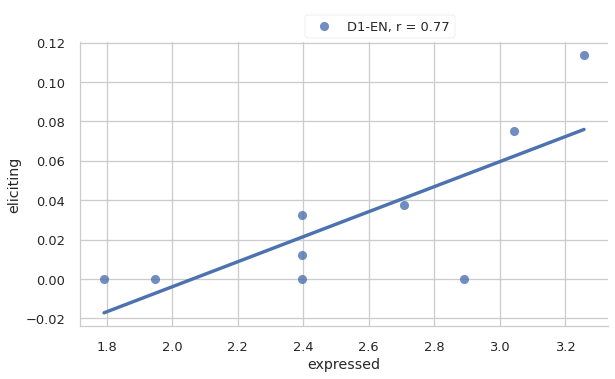

In [ ]:
fig = sns.lmplot(data = df_plot_r1, x = 'expressed', y = 'eliciting', 
                 hue = 'debate', ci = None, scatter=True)
fig.figure.set_size_inches(16, 5)
plt.title("\n")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.33, 1.03), ncol=3, title=None, frameon=True)
plt.show()

In [ ]:

df = gdeb_plot.copy() 
df = df.dropna(axis=0)
df.shape

(26, 118)

In [ ]:
ids = df[df.pathotic_response == 'surprise'].index
expressed_cor = df.loc[ids]['percentage'].values
elicit_cor = df.loc[ids]['full_argument_fear'].values

len(elicit_cor), len(expressed_cor)

(9, 9)

In [ ]:
expressed_cor

array([4.4543473 , 4.51085951, 4.26267988, 4.51085951, 4.39444915,
       4.11087386, 3.93182563, 3.93182563, 4.26267988])

In [ ]:
elicit_cor.round(3) * 100

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  8.4, 24.5, 20.5,  4.1])

In [ ]:
df_plot_g1 = pd.DataFrame({'expressed surprise':expressed_cor, 'eliciting fear':elicit_cor})
df_plot_g1['debate'] = 'D2-EN, r = -0.92'
df_plot_g1

,expressed surprise,eliciting fear,debate
0,4.454347,0.000000,"D2-EN, r = -0.92"
1,4.510860,0.000000,"D2-EN, r = -0.92"
2,4.262680,0.000000,"D2-EN, r = -0.92"
3,4.510860,0.000000,"D2-EN, r = -0.92"
4,4.394449,0.000000,"D2-EN, r = -0.92"
5,4.110874,0.083652,"D2-EN, r = -0.92"
6,3.931826,0.244709,"D2-EN, r = -0.92"
7,3.931826,0.205387,"D2-EN, r = -0.92"
8,4.262680,0.040825,"D2-EN, r = -0.92"


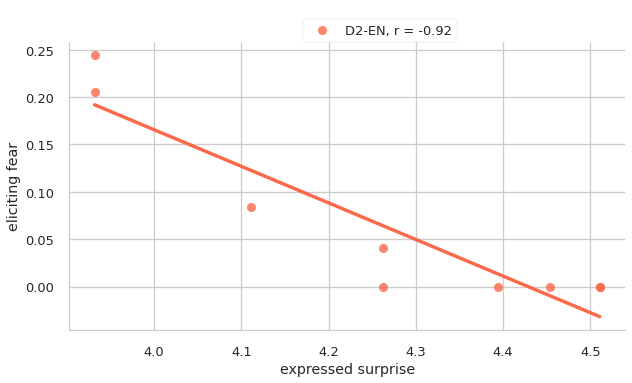

In [ ]:
fig = sns.lmplot(data = df_plot_g1, x = 'expressed surprise', y = 'eliciting fear', 
                 hue = 'debate', ci = None, palette = 'Reds', scatter=True)
fig.figure.set_size_inches(16, 5)
plt.title("\n")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.33, 1.03), ncol=3, title=None, frameon=True)
plt.show()

###PL JUNE

In [ ]:
june = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/June_corr_plots_data.xlsx')
june.shape

(812, 19)

In [ ]:
june = june[ (june.Data >= '2020-06-17 21:03:00') & (june.Data <= '2020-06-17 22:18:00') ]
june.shape

(413, 19)

In [ ]:
june.head()

,Data,mean,predicted_emotion_labels,Time,conclusion_Happiness,conclusion_Anger,conclusion_Sadness,conclusion_Fear,conclusion_Disgust,premise_Happiness,premise_Anger,premise_Sadness,premise_Fear,premise_Disgust,full_argument_Happiness,full_argument_Anger,full_argument_Sadness,full_argument_Fear,full_argument_Disgust
21,2020-06-17 21:03:00,36.571429,surprise,21:03:00,0.28984,0.03937,0.0,0.089045,0.0,0.226667,0.020473,0.0,0.07582,0.045313,0.234103,0.032057,0.0,0.066417,0.03776
22,2020-06-17 21:03:00,34.857143,anger,21:03:00,0.28984,0.03937,0.0,0.089045,0.0,0.226667,0.020473,0.0,0.07582,0.045313,0.234103,0.032057,0.0,0.066417,0.03776
23,2020-06-17 21:03:00,11.428571,fear,21:03:00,0.28984,0.03937,0.0,0.089045,0.0,0.226667,0.020473,0.0,0.07582,0.045313,0.234103,0.032057,0.0,0.066417,0.03776
24,2020-06-17 21:03:00,8.571429,joy,21:03:00,0.28984,0.03937,0.0,0.089045,0.0,0.226667,0.020473,0.0,0.07582,0.045313,0.234103,0.032057,0.0,0.066417,0.03776
25,2020-06-17 21:03:00,8.000000,sadness,21:03:00,0.28984,0.03937,0.0,0.089045,0.0,0.226667,0.020473,0.0,0.07582,0.045313,0.234103,0.032057,0.0,0.066417,0.03776


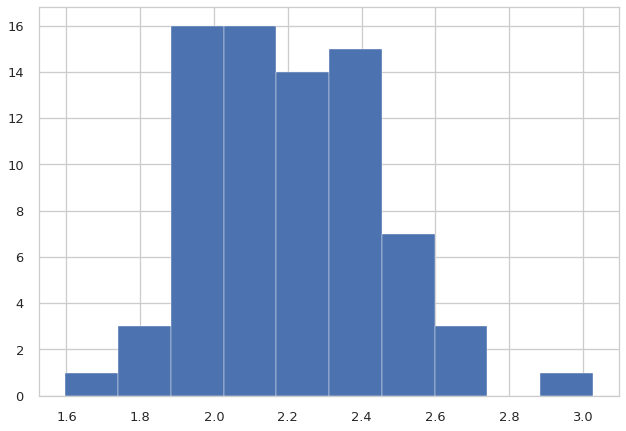

In [ ]:
june[june.predicted_emotion_labels =='fear']['mean'].hist()

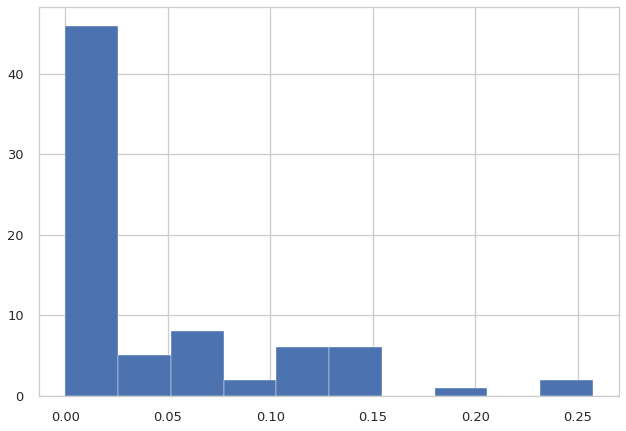

In [ ]:
june[june.predicted_emotion_labels =='fear']['conclusion_Anger'].hist()

In [ ]:
pl_cols = ['conclusion_Happiness', 'conclusion_Anger', 'conclusion_Sadness',
       'conclusion_Fear', 'conclusion_Disgust', 'premise_Happiness',
       'premise_Anger', 'premise_Sadness', 'premise_Fear', 'premise_Disgust',
       'full_argument_Happiness', 'full_argument_Anger',
       'full_argument_Sadness', 'full_argument_Fear', 'full_argument_Disgust']

In [ ]:
for c in pl_cols:
  june[c] = june[c].apply(lambda x: np.log(x+1))

june['mean'] = june['mean'].apply(lambda x: np.log(x+1))

In [ ]:
june.predicted_emotion_labels.unique()

array(['surprise', 'anger', 'fear', 'joy', 'sadness', 'disgust'],
      dtype=object)

In [ ]:
emo = ['surprise', 'fear', 'joy', 'anger', 'sadness', 'disgust'] 
# ['surprise', 'fear', 'joy', 'anger', 'sadness', 'disgust']    ['Positive', "Negative"]

claims = june.Time.unique() 
claims[:5]

array(['21:03:00', '21:04:00', '21:05:00', '21:06:00', '21:07:00'],
      dtype=object)

In [ ]:
len(claims)

76

In [ ]:

one = []
second = []
corcof = []
pvals = []

bi_one = []
bi_second = []
biser = []
pval_biser = []


df = june.copy() 
df = df.dropna(axis=0)


for ex in emo:  
  for el in pl_cols:    
    epx_val = []
    elic_val = []

    bi_epx_val = []
    bi_elic_val = []
    for c in claims:
      emotions = df[df.Time == c]['predicted_emotion_labels'].unique()
      len_eliciting = len(df[(df.Time == c) & (df['predicted_emotion_labels'] == ex) ])
      if len_eliciting > 0:
        eliciting = df[(df.Time == c) & (df['predicted_emotion_labels'] == ex) ][el].iloc[0]
        elic_val.append(eliciting)
        bi_elic_val.append(eliciting)        
      else:
        eliciting = 0


      if ((ex in emotions) and (len_eliciting > 0)):
        bi_epx_val.append(1)
        express_val = df[ (df.Time == c) & (df['predicted_emotion_labels'] == ex) ]['mean'].iloc[0]
        epx_val.append(express_val)
      elif ((ex not in emotions) and (len_eliciting > 0)):
        bi_epx_val.append(0)
        epx_val.append(0)
      else:
        pass
    if len(elic_val) > 8 and len(epx_val):

      coef2, pval = pearsonr(elic_val, epx_val)
      coefbi, bi_p = pointbiserialr(bi_elic_val, bi_epx_val)
      print(ex,  ' -- ', el)
      if pval < 0.05:
        print(epx_val, elic_val)
      print(round(coef2, 2), round(pval, 3),'\t', round(coefbi, 2), round(bi_p, 3), "\n")
      if coef2 != np.nan:
        corcof.append(round(coef2, 2))
        pvals.append(round(pval, 3))
        one.append(ex)
        second.append(el)

      if (coefbi != np.nan) or (coefbi != np.NaN):
        biser.append(round(coefbi, 2))
        pval_biser.append(round(bi_p, 3))
        bi_one.append(ex)
        bi_second.append(el)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


surprise  --  conclusion_Happiness
0.22 0.054 	 nan nan 

surprise  --  conclusion_Anger
-0.06 0.608 	 nan nan 

surprise  --  conclusion_Sadness
-0.12 0.313 	 nan nan 

surprise  --  conclusion_Fear
-0.07 0.577 	 nan nan 

surprise  --  conclusion_Disgust
0.11 0.329 	 nan nan 

surprise  --  premise_Happiness
-0.0 0.976 	 nan nan 

surprise  --  premise_Anger
[3.6262438831224513, 3.586820361065164, 3.8122661722891538, 3.8229041460989515, 3.792503769570528, 3.9023909671098007, 3.8465952001056904, 4.023408810776795, 3.952255352456272, 3.794488629952734, 3.811563914309456, 3.6676020556666513, 3.7171263622534503, 3.855538822951705, 3.7515561240340913, 3.847306690708455, 3.976825576208584, 3.8022981930028816, 3.8338040305679018, 3.8392414533410797, 3.758288905486104, 3.922135634423357, 3.944237359639399, 3.947267570201788, 3.859758728404649, 3.7754787220571644, 3.838015910909938, 3.871732031364656, 3.789184841231009, 3.816490578706582, 3.853415578474675, 3.8042847712588044, 3.6791790920159

(33, 33)

In [ ]:
# pearson r correlation - general df

df_cor4 = pd.DataFrame({"first_emotion": one, 
                       "second_emotion": second, 
                       "cor": corcof, 
                       "p_value":pvals})
df_cor4.head(2)

,first_emotion,second_emotion,cor,p_value
0,surprise,conclusion_Happiness,0.22,0.054
1,surprise,conclusion_Anger,-0.06,0.608


In [ ]:
df_cor4[df_cor4.p_value < 0.05] # june D2-PL emotions after log transform

,first_emotion,second_emotion,cor,p_value
6,surprise,premise_Anger,0.28,0.013
17,fear,conclusion_Sadness,0.25,0.031
45,anger,conclusion_Happiness,-0.25,0.027
78,disgust,conclusion_Fear,0.41,0.019
83,disgust,premise_Fear,0.35,0.045
88,disgust,full_argument_Fear,0.43,0.013


In [ ]:
df_cor4[df_cor4.p_value < 0.05].values

array([['surprise', 'premise_Anger', 0.28, 0.013],
       ['fear', 'conclusion_Sadness', 0.25, 0.031],
       ['anger', 'conclusion_Happiness', -0.25, 0.027],
       ['disgust', 'conclusion_Fear', 0.41, 0.019],
       ['disgust', 'premise_Fear', 0.35, 0.045],
       ['disgust', 'full_argument_Fear', 0.43, 0.013]], dtype=object)

In [ ]:
df = june.copy() 
df = df.dropna(axis=0)
df.shape

(413, 19)

In [ ]:
ids = df[df.predicted_emotion_labels == 'disgust'].index
expressed_cor = df.loc[ids]['mean'].values
elicit_cor = df.loc[ids]['full_argument_Fear'].values

len(elicit_cor), len(expressed_cor)

(33, 33)

In [ ]:
expressed_cor[:6]

array([0.45198512, 0.467023  , 0.71912267, 0.40713875, 0.27570588,
       0.29277114])

In [ ]:
df_plot_june = pd.DataFrame({'expressed disgust':expressed_cor, 'eliciting fear':elicit_cor})
df_plot_june['debate'] = 'D2-PL, r = 0.43'
df_plot_june.head()

,expressed disgust,eliciting fear,debate
0,0.451985,0.064304,"D2-PL, r = 0.43"
1,0.467023,0.185893,"D2-PL, r = 0.43"
2,0.719123,0.000000,"D2-PL, r = 0.43"
3,0.407139,0.000000,"D2-PL, r = 0.43"
4,0.275706,0.066127,"D2-PL, r = 0.43"


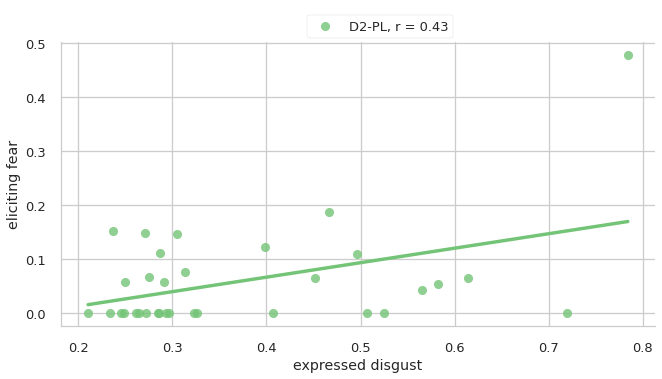

In [ ]:
fig = sns.lmplot(data = df_plot_june, x = 'expressed disgust', y = 'eliciting fear', 
                 hue = 'debate', ci = None, scatter=True, palette = "Greens")
fig.figure.set_size_inches(16, 5)
plt.title("\n")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.33, 1.03), ncol=3, title=None, frameon=True)
#plt.yticks(np.arange(0, 26, 5))
plt.show()

###PL MAY

In [ ]:
may = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/May_corr_plots_data.xlsx')
may.shape

(777, 19)

In [ ]:
may = may[ (may.Data >= '2020-05-06 20:34:00') & (may.Data <= '2020-05-06 21:42:00') ]
may.shape

(367, 19)

In [ ]:
may.head(3)

,Data,mean,predicted_emotion_labels,Time,conclusion_Happiness,conclusion_Anger,conclusion_Sadness,conclusion_Fear,conclusion_Disgust,premise_Happiness,premise_Anger,premise_Sadness,premise_Fear,premise_Disgust,full_argument_Happiness,full_argument_Anger,full_argument_Sadness,full_argument_Fear,full_argument_Disgust
25,2020-05-06 20:34:00,58.064516,surprise,20:34:00,0.414827,0.02717,0.099553,0.0,0.05664,0.12897,0.0,0.14933,0.207405,0.0,0.300747,0.0,0.13274,0.04609,0.07552
26,2020-05-06 20:34:00,17.741935,anger,20:34:00,0.414827,0.02717,0.099553,0.0,0.05664,0.12897,0.0,0.14933,0.207405,0.0,0.300747,0.0,0.13274,0.04609,0.07552
27,2020-05-06 20:34:00,12.903226,sadness,20:34:00,0.414827,0.02717,0.099553,0.0,0.05664,0.12897,0.0,0.14933,0.207405,0.0,0.300747,0.0,0.13274,0.04609,0.07552


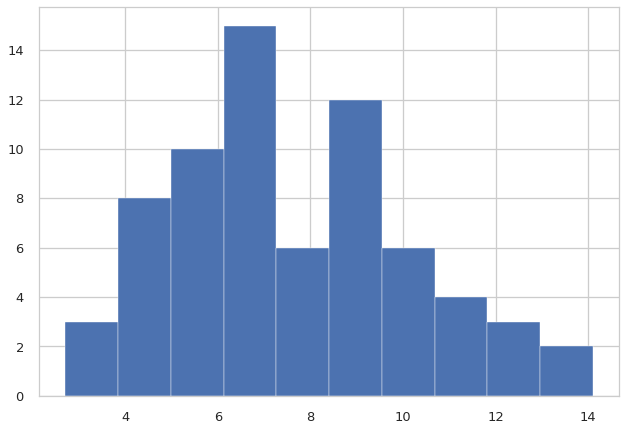

In [ ]:
may[may.predicted_emotion_labels =='fear']['mean'].hist()

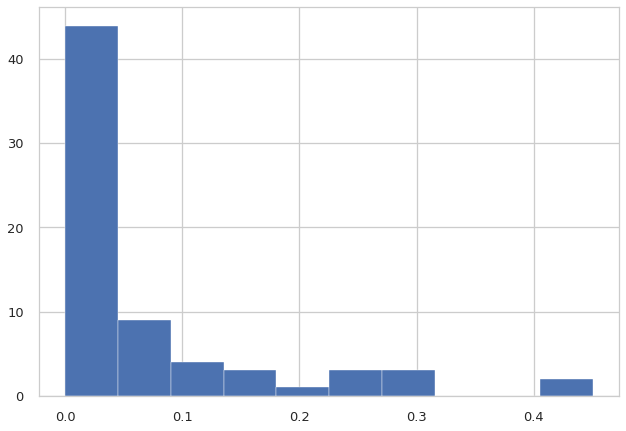

In [ ]:
may[may.predicted_emotion_labels =='fear']['conclusion_Anger'].hist()

In [ ]:
pl_cols = ['conclusion_Happiness', 'conclusion_Anger', 'conclusion_Sadness',
       'conclusion_Fear', 'conclusion_Disgust', 'premise_Happiness',
       'premise_Anger', 'premise_Sadness', 'premise_Fear', 'premise_Disgust',
       'full_argument_Happiness', 'full_argument_Anger',
       'full_argument_Sadness', 'full_argument_Fear', 'full_argument_Disgust']

In [ ]:
for c in pl_cols:
  may[c] = may[c].apply(lambda x: np.log(x+1))

may['mean'] = may['mean'].apply(lambda x: np.log(x+1))

In [ ]:
may.predicted_emotion_labels.unique()

array(['surprise', 'anger', 'sadness', 'fear', 'joy', 'disgust'],
      dtype=object)

In [ ]:
emo = ['surprise', 'fear', 'joy', 'anger', 'sadness', 'disgust'] 
# ['surprise', 'fear', 'joy', 'anger', 'sadness', 'disgust']    ['Positive', "Negative"]

claims = may.Time.unique() 
claims[:5]

array(['20:34:00', '20:35:00', '20:36:00', '20:37:00', '20:38:00'],
      dtype=object)

In [ ]:
len(claims)

69

In [ ]:

one = []
second = []
corcof = []
pvals = []

bi_one = []
bi_second = []
biser = []
pval_biser = []


df = may.copy() 
df = df.dropna(axis=0)


for ex in emo:  
  for el in pl_cols:    
    epx_val = []
    elic_val = []

    bi_epx_val = []
    bi_elic_val = []
    for c in claims:
      emotions = df[df.Time == c]['predicted_emotion_labels'].unique()
      len_eliciting = len(df[(df.Time == c) & (df['predicted_emotion_labels'] == ex) ])
      if len_eliciting > 0:
        eliciting = df[(df.Time == c) & (df['predicted_emotion_labels'] == ex) ][el].iloc[0]
        elic_val.append(eliciting)
        bi_elic_val.append(eliciting)        
      else:
        eliciting = 0


      if ((ex in emotions) and (len_eliciting > 0)):
        bi_epx_val.append(1)
        express_val = df[ (df.Time == c) & (df['predicted_emotion_labels'] == ex) ]['mean'].iloc[0]
        epx_val.append(express_val)
      elif ((ex not in emotions) and (len_eliciting > 0)):
        bi_epx_val.append(0)
        epx_val.append(0)
      else:
        pass
    if len(elic_val) > 8 and len(epx_val):

      coef2, pval = pearsonr(elic_val, epx_val)
      coefbi, bi_p = pointbiserialr(bi_elic_val, bi_epx_val)
      print(ex,  ' -- ', el)
      if pval < 0.05:
        print(epx_val, elic_val)
      print(round(coef2, 2), round(pval, 3),'\t', round(coefbi, 2), round(bi_p, 3), "\n")
      if coef2 != np.nan:
        corcof.append(round(coef2, 2))
        pvals.append(round(pval, 3))
        one.append(ex)
        second.append(el)

      if (coefbi != np.nan) or (coefbi != np.NaN):
        biser.append(round(coefbi, 2))
        pval_biser.append(round(bi_p, 3))
        bi_one.append(ex)
        bi_second.append(el)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


surprise  --  conclusion_Happiness
0.1 0.396 	 nan nan 

surprise  --  conclusion_Anger
0.03 0.802 	 nan nan 

surprise  --  conclusion_Sadness
-0.11 0.389 	 nan nan 

surprise  --  conclusion_Fear
-0.04 0.722 	 nan nan 

surprise  --  conclusion_Disgust
0.01 0.905 	 nan nan 

surprise  --  premise_Happiness
0.09 0.485 	 nan nan 

surprise  --  premise_Anger
-0.07 0.561 	 nan nan 

surprise  --  premise_Sadness
0.06 0.629 	 nan nan 

surprise  --  premise_Fear
0.04 0.744 	 nan nan 

surprise  --  premise_Disgust
-0.18 0.137 	 nan nan 

surprise  --  full_argument_Happiness
0.11 0.377 	 nan nan 

surprise  --  full_argument_Anger
-0.09 0.468 	 nan nan 

surprise  --  full_argument_Sadness
-0.04 0.733 	 nan nan 

surprise  --  full_argument_Fear
0.02 0.842 	 nan nan 

surprise  --  full_argument_Disgust
-0.11 0.354 	 nan nan 

fear  --  conclusion_Happiness
0.16 0.186 	 nan nan 

fear  --  conclusion_Anger
-0.11 0.37 	 nan nan 

fear  --  conclusion_Sadness
0.12 0.324 	 nan nan 

fear  -

In [ ]:
# pearson r correlation - general df

df_cor4 = pd.DataFrame({"first_emotion": one, 
                       "second_emotion": second, 
                       "cor": corcof, 
                       "p_value":pvals})
df_cor4.head(2)

,first_emotion,second_emotion,cor,p_value
0,surprise,conclusion_Happiness,0.10,0.396
1,surprise,conclusion_Anger,0.03,0.802


In [ ]:
df_cor4[df_cor4.p_value < 0.05] # may D1-PL emotions after log transform

,first_emotion,second_emotion,cor,p_value
45,anger,conclusion_Happiness,-0.26,0.031
75,disgust,conclusion_Happiness,0.44,0.040
79,disgust,conclusion_Disgust,0.44,0.040
89,disgust,full_argument_Disgust,0.55,0.009


In [ ]:
df_cor4[df_cor4.p_value < 0.05].values

array([['anger', 'conclusion_Happiness', -0.26, 0.031],
       ['disgust', 'conclusion_Happiness', 0.44, 0.04],
       ['disgust', 'conclusion_Disgust', 0.44, 0.04],
       ['disgust', 'full_argument_Disgust', 0.55, 0.009]], dtype=object)

In [ ]:
corr_eng.head(3)

,expressed,eliciting,coeff,pvalue,debate
0,surprise,conclusion_sadness,-0.54,0.009,D1-EN
1,surprise,conclusion_disgust,-0.51,0.016,D1-EN
2,surprise,full_argument_sadness,-0.51,0.014,D1-EN


In [ ]:

corr_pl = pd.DataFrame([['anger', 'conclusion_Happiness', -0.26, 0.031],
       ['disgust', 'conclusion_Happiness', 0.44, 0.04],
       ['disgust', 'conclusion_Disgust', 0.44, 0.04],
       ['disgust', 'full_argument_Disgust', 0.55, 0.009], 

       ['surprise', 'premise_Anger', 0.28, 0.013],
       ['fear', 'conclusion_Sadness', 0.25, 0.031],
       ['anger', 'conclusion_Happiness', -0.25, 0.027],
       ['disgust', 'conclusion_Fear', 0.41, 0.019],
       ['disgust', 'premise_Fear', 0.35, 0.045],
       ['disgust', 'full_argument_Fear', 0.43, 0.013]])

In [ ]:
corr_pl.columns = ['expressed', 'eliciting', 'coeff', 'pvalue']
corr_pl['debate'] = ["D1-PL"]*4 + ["D2-PL"]*6

In [ ]:
corr_eng

,expressed,eliciting,coeff,pvalue,debate
0,surprise,conclusion_sadness,-0.54,0.009,D1-EN
1,surprise,conclusion_disgust,-0.51,0.016,D1-EN
2,surprise,full_argument_sadness,-0.51,0.014,D1-EN
3,surprise,full_argument_disgust,-0.46,0.033,D1-EN
4,sadness,premises_anger,0.77,0.016,D1-EN
5,surprise,conclusion_fear,-0.80,0.009,D2-EN
6,surprise,conclusion_surprise,0.77,0.016,D2-EN
7,surprise,full_argument_anger,-0.77,0.015,D2-EN
8,surprise,full_argument_fear,-0.92,0.000,D2-EN
9,surprise,full_argument_surprise,0.76,0.017,D2-EN


In [ ]:
corr_pl

,expressed,eliciting,coeff,pvalue,debate
0,anger,conclusion_Happiness,-0.26,0.031,D1-PL
1,disgust,conclusion_Happiness,0.44,0.040,D1-PL
2,disgust,conclusion_Disgust,0.44,0.040,D1-PL
3,disgust,full_argument_Disgust,0.55,0.009,D1-PL
4,surprise,premise_Anger,0.28,0.013,D2-PL
5,fear,conclusion_Sadness,0.25,0.031,D2-PL
6,anger,conclusion_Happiness,-0.25,0.027,D2-PL
7,disgust,conclusion_Fear,0.41,0.019,D2-PL
8,disgust,premise_Fear,0.35,0.045,D2-PL
9,disgust,full_argument_Fear,0.43,0.013,D2-PL


In [ ]:
df = may.copy() 
df = df.dropna(axis=0)
df.shape

(367, 19)

In [ ]:
ids = df[df.predicted_emotion_labels == 'anger'].index
expressed_cor = df.loc[ids]['mean'].values
elicit_cor = df.loc[ids]['conclusion_Happiness'].values

len(elicit_cor), len(expressed_cor)

(69, 69)

In [ ]:
expressed_cor

In [ ]:
df_plot_may = pd.DataFrame({'expressed anger':expressed_cor, 'eliciting joy':elicit_cor})
df_plot_may['debate'] = 'D1-PL, r = -0.26'
df_plot_may.head()

,expressed anger,eliciting joy,debate
0,2.930764,0.347007,"D1-PL, r = -0.26"
1,2.717434,0.184997,"D1-PL, r = -0.26"
2,2.420938,0.230683,"D1-PL, r = -0.26"
3,3.106751,0.472787,"D1-PL, r = -0.26"
4,2.667371,0.351674,"D1-PL, r = -0.26"


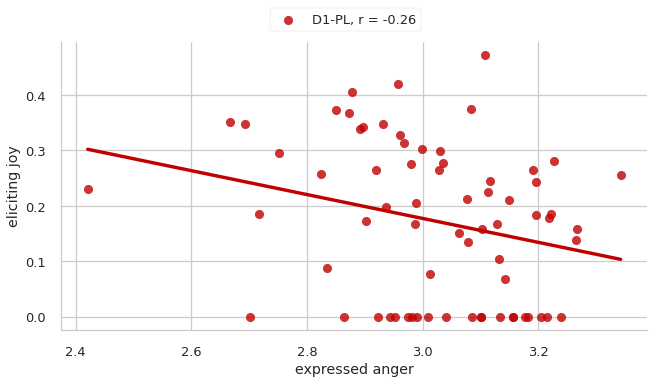

In [ ]:
fig = sns.lmplot(data = df_plot_may, x = 'expressed anger', y = 'eliciting joy', 
                 hue = 'debate', ci = None, scatter=True, palette = "gist_heat")
fig.figure.set_size_inches(16, 5)
plt.title("\n")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.3, 1.06), ncol=3, title=None, frameon=True)
#plt.yticks(np.arange(0, 5, 1))
plt.show()

###ALL 4

In [ ]:
for d in [df_plot_r1, df_plot_g1, df_plot_may, df_plot_june]:
  d.columns = ['Expressed emotion (log)', 'Eliciting emotion (log)', 'debate']

In [ ]:
df_plot_all = pd.concat([df_plot_r1, df_plot_g1, df_plot_may, df_plot_june], axis= 0)
df_plot_all.tail()

,Expressed emotion (log),Eliciting emotion (log),debate
28,0.326494,0.000000,"D2-PL, r = 0.43"
29,0.304445,0.146464,"D2-PL, r = 0.43"
30,0.524524,0.000000,"D2-PL, r = 0.43"
31,0.313092,0.076090,"D2-PL, r = 0.43"
32,0.291055,0.056538,"D2-PL, r = 0.43"


In [ ]:
df_plot_all['debate'] = df_plot_all['debate'].apply(lambda x: str(x).replace(", ", ",  "))

In [ ]:
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 
 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',
  'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
  'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
   'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r',
    'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix',
     'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
     'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
     'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
     'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'
'''

In [ ]:
pal = ['#656464', '#656464', '#656464', '#656464'] 
color_d = sns.color_palette(pal)
color_d

[(0.396078431372549, 0.39215686274509803, 0.39215686274509803),
 (0.396078431372549, 0.39215686274509803, 0.39215686274509803),
 (0.396078431372549, 0.39215686274509803, 0.39215686274509803),
 (0.396078431372549, 0.39215686274509803, 0.39215686274509803)]

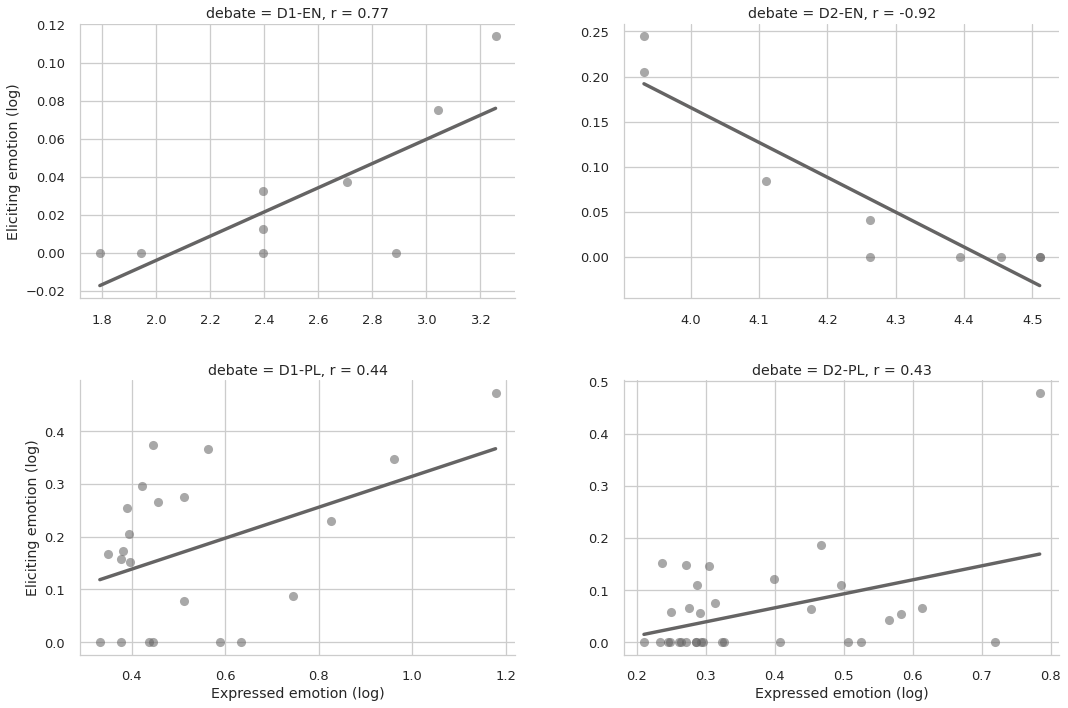

In [ ]:
fig = sns.lmplot(data = df_plot_all, x = 'Expressed emotion (log)', y = 'Eliciting emotion (log)', 
                 ci=None, scatter=True, palette = color_d, hue = 'debate',
                 col = 'debate', col_wrap = 2, sharex = False, sharey = False, 
                 scatter_kws = {'alpha':0.56})
fig.figure.set_size_inches(15, 10)
#plt.title("\n")
#sns.move_legend(fig, "upper center", bbox_to_anchor=(0.3, 1.06), ncol=3, title=None, frameon=True)
#plt.yticks(np.arange(0, 5, 1))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.25)
for ax in fig.axes:
    ax.tick_params(axis='y', labelleft=True)#fig.axes.set_ylim(-1, 25)
    ax.tick_params(axis='x', labelleft=True)
plt.show()

#Arg scheme match

In [ ]:
arg = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/agg_dummies_fleiss_all_maps.xlsx')
print(arg.shape)
arg.head(1)

(529, 10)


,conclusion,premise,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,I just went to a wedding of a friend of mine who happens to be gay,"if somebody doesn't think the way KASICH does, it doesn't mean that KASICH can't care about them or can't love them",0,0,0,0,0,0,5,0


In [ ]:
arg.columns = ['conclusion_schemes', 'premise_schemes', 'scheme_name_Causal Slippery Slope',
       'scheme_name_Danger Appeal', 'scheme_name_Default Inference',
       'scheme_name_Fear Appeal', 'scheme_name_Need For Help',
       'scheme_name_Negative Consequences',
       'scheme_name_Positive Consequences', 'scheme_name_Waste']

In [ ]:
arg2 = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/all_annotated_schemes_3774.xlsx')
print(arg2.shape)
arg2.head(1)

(3774, 18)


,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste,annotator,original_map_ID,Link
0,CLINTON has a very robust set of plans,We also have to look at how we help families balance the responsibilities at home and the responsibilities at business,24867,Positive Consequences,27,2,1,0,0,0,0,0,0,1,0,Anna Kałdonek,10624,http://www.aifdb.org/argview/24867


In [ ]:
arg.columns

Index(['conclusion_schemes', 'premise_schemes',
       'scheme_name_Causal Slippery Slope', 'scheme_name_Danger Appeal',
       'scheme_name_Default Inference', 'scheme_name_Fear Appeal',
       'scheme_name_Need For Help', 'scheme_name_Negative Consequences',
       'scheme_name_Positive Consequences', 'scheme_name_Waste'],
      dtype='object')

In [ ]:
arg2 = arg2[['conclusion', 'premise', 'Causal Slippery Slope',
       'Danger Appeal', 'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']]

arg2.columns = arg.columns  

In [ ]:
arg = pd.concat([arg, arg2], axis = 0)
print(arg.shape)
arg = arg.drop_duplicates(['conclusion_schemes', 'premise_schemes'], keep = 'first')
arg.shape

(4303, 10)


(1629, 10)

In [ ]:
arg.reset_index(drop=True, inplace=True)

In [ ]:
arg.describe()

,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000
mean,0.009208,0.054021,1.030080,0.068140,0.086556,0.496010,0.543892,0.011050
std,0.095545,0.231497,1.275725,0.314901,0.379767,1.064627,1.058519,0.110285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,2.000000,5.000000,3.000000,4.000000,5.000000,5.000000,2.000000


In [ ]:
rdeb_grpd.shape

(72, 3)

In [ ]:
# rdeb_grpd['percentage'] = rdeb_grpd['percentage'].apply(lambda x: np.log(x+1))


In [ ]:
rdeb_grpd.tail(8)

,debate_claim,pathotic_response,percentage
64,us navy is at its smallest size since 1917,Neutral,50.0
65,us navy is at its smallest size since 1917,Positive,50.0
66,we now have clear evidence on the dna schedule,Negative,60.0
67,we now have clear evidence on the dna schedule,Neutral,40.0
68,who has prosecuted and investigated and jailed terrorists in this country after september 11th,Negative,71.0
69,who has prosecuted and investigated and jailed terrorists in this country after september 11th,Neutral,29.0
70,"you make $ 10 billion , you pay a billion",Neutral,80.0
71,"you make $ 10 billion , you pay a billion",Negative,20.0


In [ ]:
id_arg = []
id_deb = []
for i in arg.index:
  for i2 in rdeb_grpd.index:
    if (arg.loc[i, 'conclusion_schemes'].strip().lower() in rdeb_grpd.loc[i2, 'debate_claim'].strip().lower()) or (arg.loc[i, 'premise_schemes'].strip().lower() in rdeb_grpd.loc[i2, 'debate_claim'].strip().lower()):
      id_arg.append(i)
      id_deb.append(i2)

len(id_arg), len(id_deb), id_arg[:3]

(83, 83, [0, 0, 5])

In [ ]:
argmatched = arg.loc[id_arg]
argmatched.reset_index(drop=True, inplace=True)

debmatched = rdeb_grpd.loc[id_deb]
debmatched.reset_index(drop=True, inplace=True)

dfmatched = pd.concat([argmatched, debmatched], axis = 1)
dfmatched.drop_duplicates(inplace=True)
dfmatched.shape

(83, 13)

In [ ]:
dfmatched.iloc[8:12]

,conclusion_schemes,premise_schemes,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste,debate_claim,pathotic_response,percentage
8,BUSH knows how to do this,as governor of the state of Florida I created the first statewide voucher program in the country,0,0,2,0,0,0,3,0,as governor of the state of florida i created the first statewide voucher program in the country,Negative,40.0
9,"CHRISTIE is the only guy on this stage who 's put out a detailed , 12 point plan on entitlement reform","71 % of federal spending right now is on entitlements , and debt service , 71 %",0,0,3,0,0,0,2,0,"71 % of federal spending right now is on entitlements , and debt service , 71 %",Negative,50.0
10,"CHRISTIE is the only guy on this stage who 's put out a detailed , 12 point plan on entitlement reform","71 % of federal spending right now is on entitlements , and debt service , 71 %",0,0,3,0,0,0,2,0,"71 % of federal spending right now is on entitlements , and debt service , 71 %",Neutral,50.0
11,everybody gets treated the same way,"You make $ 10 billion , you pay a billion",0,0,2,0,0,0,3,0,"you make $ 10 billion , you pay a billion",Neutral,80.0


In [ ]:
rdeb_grpd[rdeb_grpd.debate_claim.str.strip() == dfmatched.debate_claim.iloc[8]]

,debate_claim,pathotic_response,percentage
2,as governor of the state of florida i created the first statewide voucher program in the country,Neutral,60.0
3,as governor of the state of florida i created the first statewide voucher program in the country,Negative,40.0


In [ ]:
schems = ['scheme_name_Causal Slippery Slope', 'scheme_name_Danger Appeal',
       'scheme_name_Fear Appeal', 'scheme_name_Need For Help', 'scheme_name_Negative Consequences',
       'scheme_name_Positive Consequences', 'scheme_name_Waste']


In [ ]:
dfmatched[schems].describe()

,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
count,83.0,83.0,83.000000,83.0,83.000000,83.000000,83.000000
mean,0.0,0.0,0.048193,0.0,0.421687,1.180723,0.024096
std,0.0,0.0,0.308561,0.0,1.094560,1.482784,0.154281
min,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
75%,0.0,0.0,0.000000,0.0,0.000000,2.000000,0.000000
max,0.0,0.0,2.000000,0.0,5.000000,5.000000,1.000000


In [ ]:
dfmatched[schems].head()

,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,0,0,0,0,0,5,0
1,0,0,0,0,0,5,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0


###Corr biserial

In [ ]:
for s in schems:
  dfmatched[s] = np.where(dfmatched[s] > 0, 1, 0)

dfmatched[schems].head()

,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0


####**Emotions**

In [ ]:
dfmatched.pathotic_response.unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
coeffs_all = []
p_val_all = []
scheme_all = []
emo_all = []

for s in schems:
  print(s)  
  for e in dfmatched.pathotic_response.unique():
    print(e)
    corr_df = dfmatched[dfmatched.pathotic_response == e]
    sm_response_sentiment = corr_df['percentage'].apply(float).values
    binary_scheme = corr_df[s].apply(int).values
    if len(sm_response_sentiment) > 2:
      scheme_all.append(s)
      emo_all.append(e)
      coefbi, bi_p = pointbiserialr(binary_scheme, sm_response_sentiment)
      coeffs_all.append(round(coefbi, 2))
      p_val_all.append(round(bi_p, 3))

    if bi_p <= 0.05:
      print(f'\t {s} - {e} - coeff= {round(coefbi, 2)}:  p= {round(bi_p, 3)}\t n samples: {len(sm_response_sentiment)} ')
      print(len(corr_df))

scheme_name_Causal Slippery Slope
Negative
Neutral
Positive
scheme_name_Danger Appeal
Negative
Neutral
Positive
scheme_name_Fear Appeal
Negative
Neutral
Positive
	 scheme_name_Fear Appeal - Positive - coeff= 0.48:  p= 0.037	 n samples: 19 
19
scheme_name_Need For Help
Negative
Neutral
Positive
scheme_name_Negative Consequences
Negative
Neutral
Positive
scheme_name_Positive Consequences
Negative
Neutral
Positive
scheme_name_Waste
Negative
Neutral
Positive


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
df_cor_bi_emo = pd.DataFrame({"scheme": scheme_all, 'emotion': emo_all, 
                       "cor": coeffs_all, 
                       "p_value":p_val_all})

df_cor_bi_emo.tail()

,scheme,emotion,cor,p_value
16,scheme_name_Positive Consequences,Neutral,0.07,0.701
17,scheme_name_Positive Consequences,Positive,-0.32,0.187
18,scheme_name_Waste,Negative,-0.04,0.827
19,scheme_name_Waste,Neutral,0.12,0.506
20,scheme_name_Waste,Positive,NaN,NaN


In [ ]:
df_cor_bi_emo[df_cor_bi_emo.p_value <= 0.05]

,scheme,emotion,cor,p_value
8,scheme_name_Fear Appeal,Positive,0.48,0.037


####**Sentiment**

In [ ]:
corr_pos = dfmatched[dfmatched.pathotic_response == 'Positive']
corr_pos.shape

(19, 13)

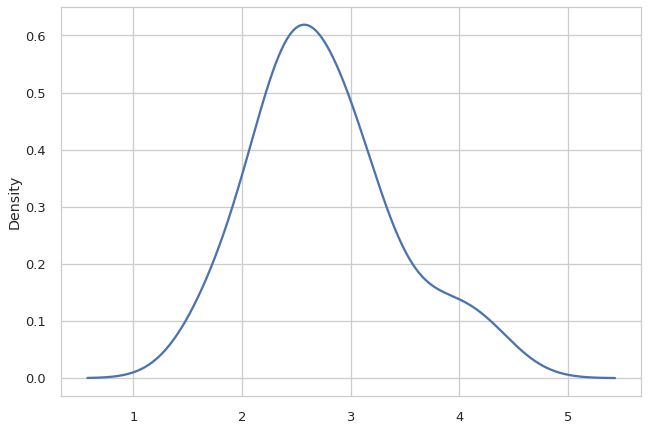

In [ ]:
corr_pos.percentage.plot.kde()

In [ ]:
corr_neg = dfmatched[dfmatched.pathotic_response == 'Negative']
corr_neg.shape

(31, 13)

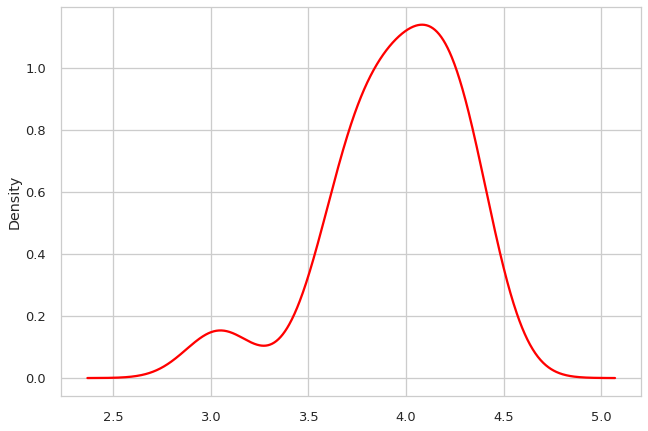

In [ ]:
corr_neg.percentage.plot.kde(color = 'red')

In [ ]:
coeffs_all = []
p_val_all = []
scheme_all = []

for s in schems:
  print(s)
  scheme_all.append(s)
  sm_response_sentiment = corr_pos['percentage'].apply(float).values
  binary_scheme = corr_pos[s].apply(int).values

  coefbi, bi_p = pointbiserialr(binary_scheme, sm_response_sentiment)
  coeffs_all.append(round(coefbi, 2))
  p_val_all.append(round(bi_p, 3))

  if bi_p <= 0.05:
    print(f'\t {s} - coeff: {coefbi}:  {round(bi_p, 3)}')

scheme_name_Causal Slippery Slope
scheme_name_Danger Appeal
scheme_name_Fear Appeal
	 scheme_name_Fear Appeal - coeff: 0.4808783782500955:  0.037
scheme_name_Need For Help
scheme_name_Negative Consequences
scheme_name_Positive Consequences
scheme_name_Waste


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
# positive expressed sentiment R1 normal values

df_cor_bi_pos = pd.DataFrame({"scheme": scheme_all, 
                       "cor": coeffs_all, 
                       "p_value":p_val_all})

df_cor_bi_pos

,scheme,cor,p_value
0,scheme_name_Causal Slippery Slope,NaN,NaN
1,scheme_name_Danger Appeal,NaN,NaN
2,scheme_name_Fear Appeal,0.48,0.037
3,scheme_name_Need For Help,NaN,NaN
4,scheme_name_Negative Consequences,0.06,0.823
5,scheme_name_Positive Consequences,-0.32,0.187
6,scheme_name_Waste,NaN,NaN


In [ ]:
# positive expressed sentiment R1 after log transform

df_cor_bi_pos = pd.DataFrame({"scheme": scheme_all, 
                       "cor": coeffs_all, 
                       "p_value":p_val_all})

df_cor_bi_pos # none - one approaches significance - index 2

,scheme,cor,p_value
0,scheme_name_Causal Slippery Slope,NaN,NaN
1,scheme_name_Danger Appeal,NaN,NaN
2,scheme_name_Fear Appeal,0.45,0.056
3,scheme_name_Need For Help,NaN,NaN
4,scheme_name_Negative Consequences,0.08,0.759
5,scheme_name_Positive Consequences,-0.24,0.326
6,scheme_name_Waste,NaN,NaN


In [ ]:
# positive expressed sentiment G1 after log transform

df_cor_bi_pos = pd.DataFrame({"scheme": scheme_all, 
                       "cor": coeffs_all, 
                       "p_value":p_val_all})

df_cor_bi_pos # none

,scheme,cor,p_value
0,scheme_name_Causal Slippery Slope,NaN,NaN
1,scheme_name_Danger Appeal,0.38,0.286
2,scheme_name_Fear Appeal,NaN,NaN
3,scheme_name_Need For Help,NaN,NaN
4,scheme_name_Negative Consequences,0.10,0.779
5,scheme_name_Positive Consequences,-0.25,0.486
6,scheme_name_Waste,NaN,NaN


In [ ]:
coeffs_all = []
p_val_all = []
scheme_all = []

for s in schems:
  print(s)
  scheme_all.append(s)
  sm_response_sentiment = corr_neg['percentage'].apply(float).values
  binary_scheme = corr_neg[s].apply(int).values

  coefbi, bi_p = pointbiserialr(binary_scheme, sm_response_sentiment)
  coeffs_all.append(round(coefbi, 2))
  p_val_all.append(round(bi_p, 3))

  if bi_p <= 0.05:
    print(f'\t {s} - coeff: {coefbi}:  {round(bi_p, 3)}')

scheme_name_Causal Slippery Slope
scheme_name_Danger Appeal
scheme_name_Fear Appeal
scheme_name_Need For Help
scheme_name_Negative Consequences
scheme_name_Positive Consequences
scheme_name_Waste


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
# negative expressed sentiment

df_cor_bi_neg = pd.DataFrame({"scheme": scheme_all, 
                       "cor": coeffs_all, 
                       "p_value":p_val_all})

df_cor_bi_neg

,scheme,cor,p_value
0,scheme_name_Causal Slippery Slope,NaN,NaN
1,scheme_name_Danger Appeal,NaN,NaN
2,scheme_name_Fear Appeal,NaN,NaN
3,scheme_name_Need For Help,NaN,NaN
4,scheme_name_Negative Consequences,-0.15,0.406
5,scheme_name_Positive Consequences,-0.02,0.916
6,scheme_name_Waste,-0.04,0.827
